In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

# Try different encodings like 'latin1', 'iso-8859-1', or 'cp1252'
df = pd.read_csv(r'/content/spam.csv', encoding='latin1')
# If 'latin1'

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:

"""
1 . data cleaning
2 . eda
3 . text preprocessing
4 . model building
5 . model evaluation
6 . model deployment

"""

'\n1 . data cleaning\n2 . eda\n3 . text preprocessing\n4 . model building\n5 . model evaluation\n6 . model deployment\n\n'

In [6]:
# data cleaning....


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last three col


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample()

,v1,v2
2384,ham,"Sorry, I'll call later"


In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df.sample(5)

,target,text
1551,ham,In e msg jus now. U said thanks for gift.
1338,ham,Aight sorry I take ten years to shower. What's...
2530,ham,So the sun is anti sleep medicine.
460,ham,Where did u go? My phone is gonna die you have...
4868,ham,1. Tension face 2. Smiling face 3. Waste face ...


In [13]:
# label encoder

from sklearn.preprocessing import LabelEncoder # Corrected the typo from 'propessing' to 'preprocessing'
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.sample(5)

,target,text
628,1,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...
4314,0,Captain is in our room:)
1364,0,Hey i will be really pretty late... You want t...
3530,0,Prepare to be pounded every night...
3305,0,HI DARLIN I FINISH AT 3 DO U 1 2 PICK ME UP OR...


In [15]:
df.isnull().sum()

,0
target,0
text,0


In [16]:
# check duplicate
df.duplicated().sum()

403

In [17]:
# remove duplicate
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

In [20]:
# eda


In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

,count
target,
0,4516
1,653


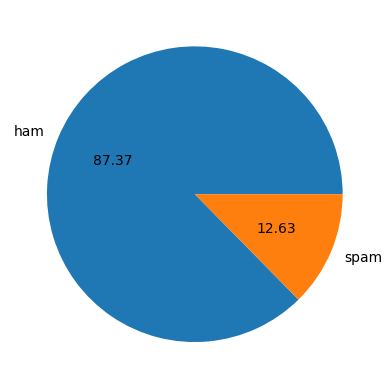

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
# data is imbalance.......
#by seeing the pie chart we can say that data is imbalance

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
"""
add the coln
1 . no of char in sms
2 . no of words in sms
3 . no of sentence in sms
"""

'\nadd the coln\n1 . no of char in sms\n2 . no of words in sms\n3 . no of sentence in sms\n'

In [28]:
df['num_characters']=df['text'].apply(len) # checking the character for each sms

In [29]:
import nltk

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# no  of words
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
# no of sentences
df['num_sent']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df[df['target'] == 0] [['num_characters','num_words','num_sent']].describe() # ham msg

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
df[df['target'] == 1] [['num_characters','num_words','num_sent']].describe() # spam msg

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

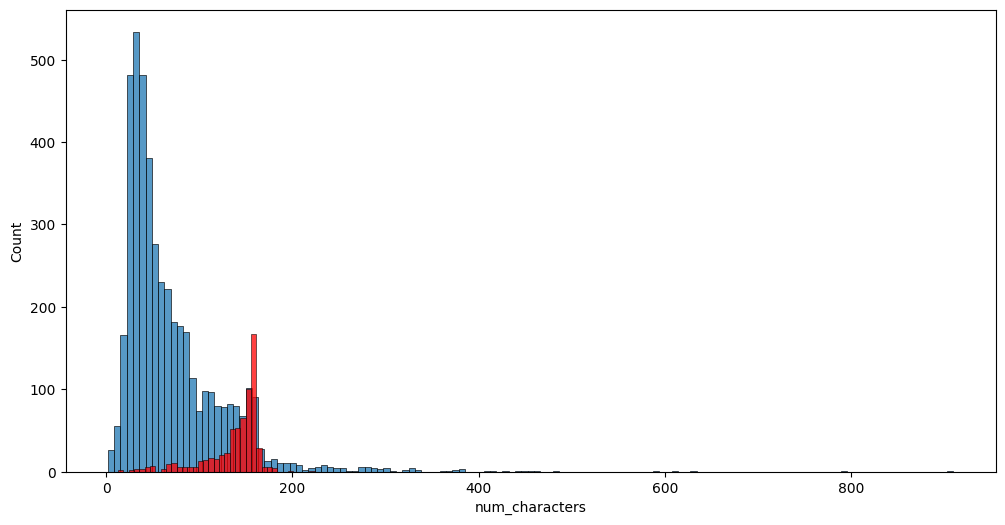

In [37]:
# no of char\
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

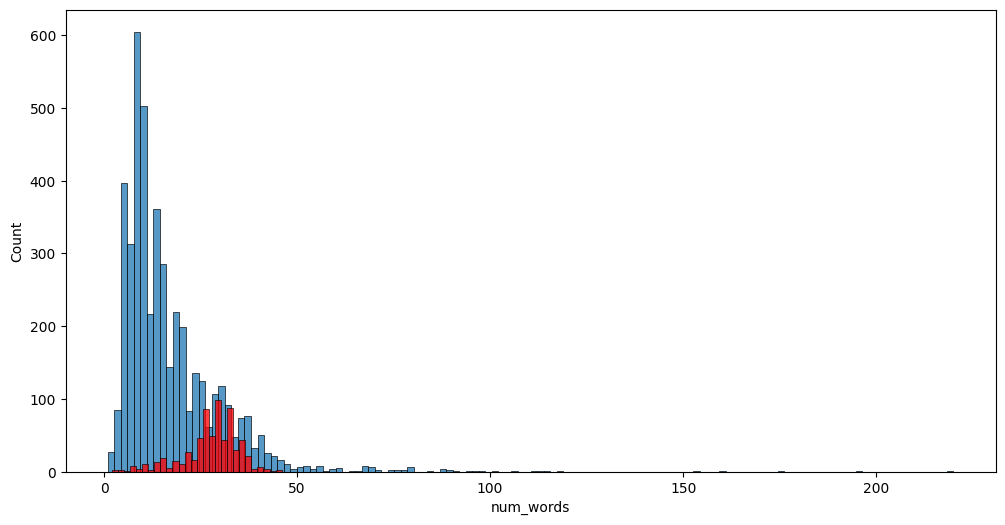

In [38]:
# no of word
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color = 'red')

<Axes: xlabel='num_sent', ylabel='Count'>

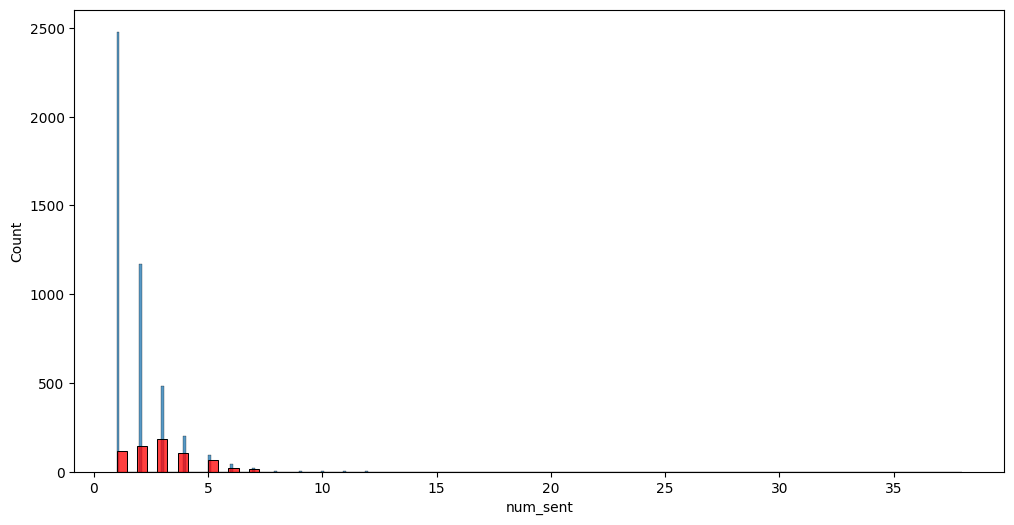

In [39]:
# no of sent
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color = 'red')

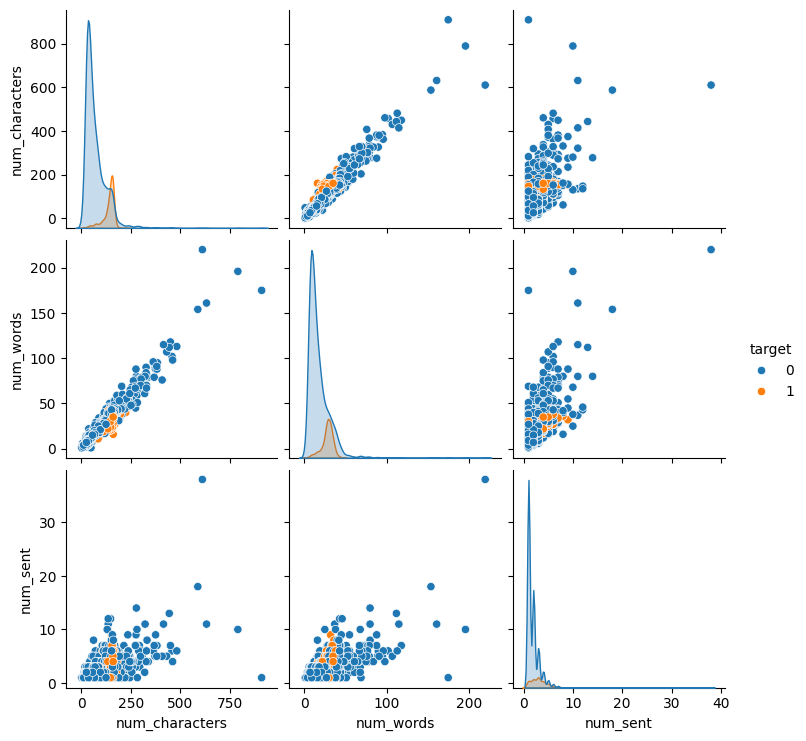

In [40]:
sns.pairplot(df,hue='target')

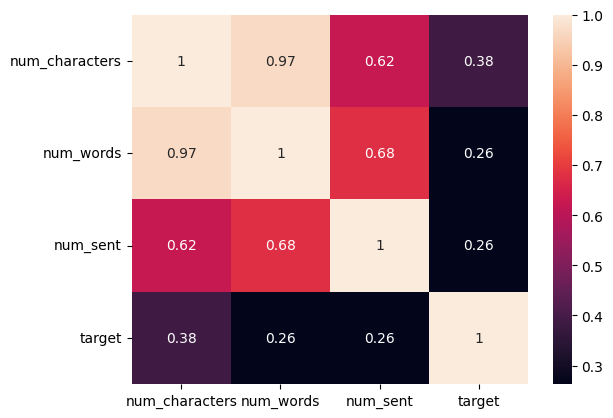

In [41]:
# Select only numerical features for correlation
numerical_df = df[['num_characters', 'num_words', 'num_sent', 'target']]

# Calculate correlation and plot heatmap
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [42]:
# data preprocessing
"""
lower case
tokenization
remove special char
remove stop words and punctuation
stemming
"""

'\nlower case\ntokenization\nremove special char\nremove stop words and punctuation\nstemming\n'

In [43]:
from nltk.corpus import stopwords

# Download the stopwords dataset
import nltk
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [45]:
def transfrom_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english')and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [46]:
import nltk
import string # Import the string module

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

ps = PorterStemmer()


def transfrom_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:  # Now string.punctuation is accessible
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

df['transformed_text'] = df['text'].apply(transfrom_text) # Apply the function and store the result in a new column

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [47]:
df['transformed_text'] = df['text'].apply(transfrom_text)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

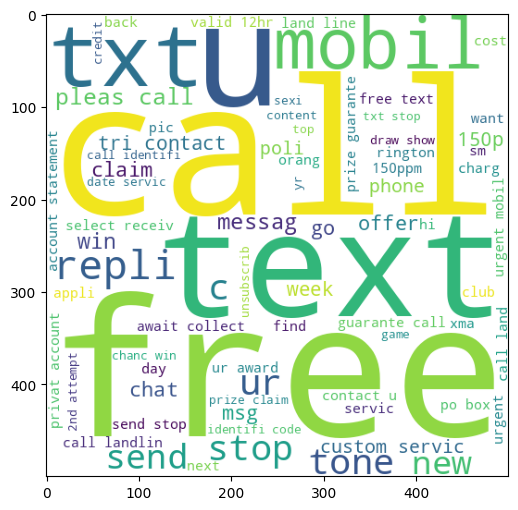

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

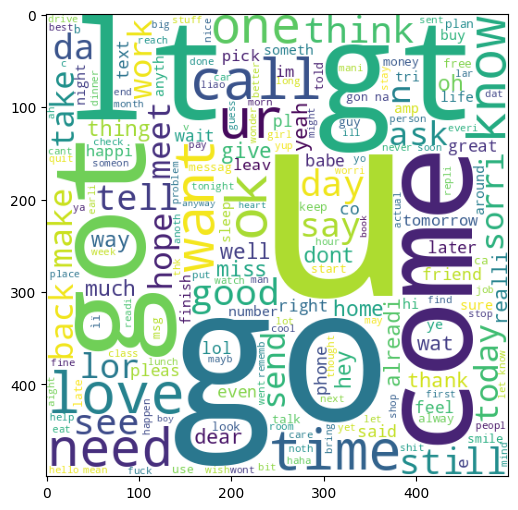

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
spam_corpus  = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [56]:
len(spam_corpus)

9939

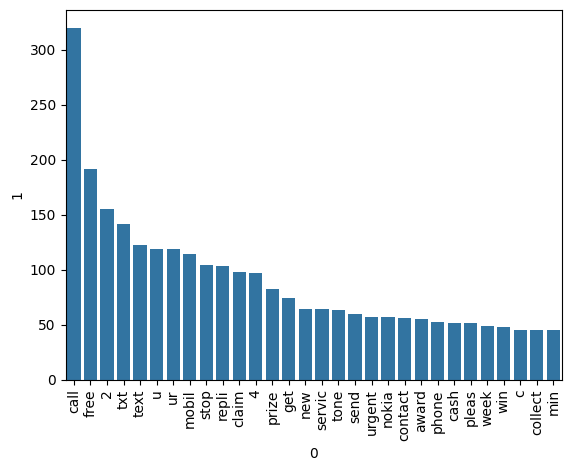

In [57]:
from collections import Counter
import pandas as pd
import seaborn as sns
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
ham_corpus  = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [59]:
len(ham_corpus)

35404

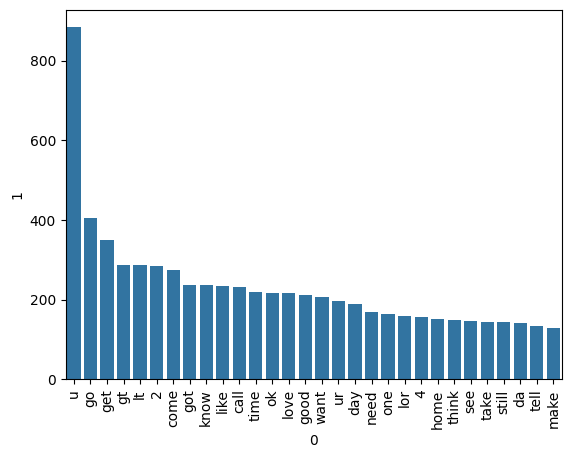

In [60]:
from collections import Counter
import pandas as pd
import seaborn as sns
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
# model buildling


In [116]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [63]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [64]:
X.shape

(5169, 6708)

In [65]:
y = df['target'].values

In [66]:
from sklearn.model_selection import train_test_split


In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [72]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [117]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [118]:
y = df['target'].values

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [120]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [121]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [79]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [80]:
 # wew will choose the mnb as the precison is 1.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2 )
etc = ExtraTreesClassifier(n_estimators=50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [83]:
clfs = {
  'SVC' : svc,
  'KN' : knc,
  'NB' : mnb,
  'DT' : dtc,
  'LR' : lrc,
  'RF' : rfc,
  'AdaBoost' : abc,
  'BgC' : bc,
  'ETC' : etc,
  'GBDT' : gbdt,
  'xgb' : xgb
}


In [84]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision


In [85]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [86]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  print(f"{name} accuracy is {current_accuracy}")
  print(f"{name} precision is {current_precision}")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

SVC accuracy is 0.9758220502901354
SVC precision is 0.9747899159663865
KN accuracy is 0.9052224371373307
KN precision is 1.0
NB accuracy is 0.9709864603481625
NB precision is 1.0
DT accuracy is 0.9303675048355899
DT precision is 0.8173076923076923
LR accuracy is 0.9584139264990329
LR precision is 0.9702970297029703
RF accuracy is 0.9758220502901354
RF precision is 0.9829059829059829
AdaBoost accuracy is 0.9245647969052224
AdaBoost precision is 0.8488372093023255
BgC accuracy is 0.9584139264990329
BgC precision is 0.8682170542635659
ETC accuracy is 0.9748549323017408
ETC precision is 0.9745762711864406
GBDT accuracy is 0.9468085106382979
GBDT precision is 0.9191919191919192
xgb accuracy is 0.9671179883945842
xgb precision is 0.9262295081967213


In [87]:
perfomrance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [88]:
perfomrance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [89]:
#model improvment
# 1. change the max_features in tfidf = 3000
# use the scale value for the x

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [91]:
y = df['target'].values


In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [94]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2 )
etc = ExtraTreesClassifier(n_estimators=50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [95]:
clfs = {
  'SVC' : svc,
  'KN' : knc,
  'NB' : mnb,
  'DT' : dtc,
  'LR' : lrc,
  'RF' : rfc,
  'AdaBoost' : abc,
  'BgC' : bc,
  'ETC' : etc,
  'GBDT' : gbdt,
  'xgb' : xgb
}


In [96]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision


In [97]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.9274193548387096)

In [98]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  print(f"{name} accuracy is {current_accuracy}")
  print(f"{name} precision is {current_precision}")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

SVC accuracy is 0.9690522243713733
SVC precision is 0.9274193548387096
KN accuracy is 0.9052224371373307
KN precision is 0.9761904761904762
NB accuracy is 0.9787234042553191
NB precision is 0.9461538461538461
DT accuracy is 0.9274661508704062
DT precision is 0.8118811881188119
LR accuracy is 0.9671179883945842
LR precision is 0.9642857142857143
RF accuracy is 0.9758220502901354
RF precision is 0.9829059829059829
AdaBoost accuracy is 0.9245647969052224
AdaBoost precision is 0.8488372093023255
BgC accuracy is 0.9584139264990329
BgC precision is 0.8682170542635659
ETC accuracy is 0.9748549323017408
ETC precision is 0.9745762711864406
GBDT accuracy is 0.9468085106382979
GBDT precision is 0.9191919191919192
xgb accuracy is 0.9671179883945842
xgb precision is 0.9262295081967213


In [99]:
# we are not getting any improvment on scaling the vlues so now use the tfidf to check the result and use the mnb for the model devplment

In [100]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [101]:
y = df['target']

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [103]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score
  return accuracy,precision

In [104]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354,
 <function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

In [106]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  print(f"{name} accuracy is {current_accuracy}")
  print(f"{name} precision is {current_precision}")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

SVC accuracy is 0.9758220502901354
SVC precision is <function precision_score at 0x7b4e9726d5a0>
KN accuracy is 0.9052224371373307
KN precision is <function precision_score at 0x7b4e9726d5a0>
NB accuracy is 0.9709864603481625
NB precision is <function precision_score at 0x7b4e9726d5a0>
DT accuracy is 0.9274661508704062
DT precision is <function precision_score at 0x7b4e9726d5a0>
LR accuracy is 0.9584139264990329
LR precision is <function precision_score at 0x7b4e9726d5a0>
RF accuracy is 0.9758220502901354
RF precision is <function precision_score at 0x7b4e9726d5a0>
AdaBoost accuracy is 0.9245647969052224
AdaBoost precision is <function precision_score at 0x7b4e9726d5a0>
BgC accuracy is 0.9584139264990329
BgC precision is <function precision_score at 0x7b4e9726d5a0>
ETC accuracy is 0.9748549323017408
ETC precision is <function precision_score at 0x7b4e9726d5a0>
GBDT accuracy is 0.9468085106382979
GBDT precision is <function precision_score at 0x7b4e9726d5a0>
xgb accuracy is 0.9671179883

In [107]:
# now we will try using the adding the new col to check the performance

In [108]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [109]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [110]:
y = df['target'].values

In [111]:
# Reshape df['num_characters'].values to have 2 dimensions
X = np.hstack((X,df['num_characters'].values.reshape(-1, 1)))

In [112]:
X.shape

(5169, 6709)

In [113]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [114]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate metrics
    current_accuracy = accuracy_score(y_test, y_pred)
    current_precision = precision_score(y_test, y_pred, average='weighted')  # Adjust `average` as needed

    return current_accuracy, current_precision


In [115]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  print(f"{name} accuracy is {current_accuracy}")
  print(f"{name} precision is {current_precision}")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC accuracy is 0.8665377176015474
SVC precision is 0.7508876160260991
KN accuracy is 0.9323017408123792
KN precision is 0.9298693070827595
NB accuracy is 0.9690522243713733
NB precision is 0.9686029755497133
DT accuracy is 0.9497098646034816
DT precision is 0.947818119851812
LR accuracy is 0.97678916827853
LR precision is 0.9764665927380334
RF accuracy is 0.971953578336557
RF precision is 0.9725104690642599
AdaBoost accuracy is 0.9448742746615088
AdaBoost precision is 0.9429317787529989
BgC accuracy is 0.9680851063829787
BgC precision is 0.967477398913617
ETC accuracy is 0.97678916827853
ETC precision is 0.977138823099291
GBDT accuracy is 0.9516441005802708
GBDT precision is 0.9508610792753525
xgb accuracy is 0.9709864603481625
xgb precision is 0.9704888549178381


In [122]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))